<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 133.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 189.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 130.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 163.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 143.9 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Modified_Datset.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Binned
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.94,0-5
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6.94,10-20
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,6.94,>20
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,6.94,0-5
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,6.94,0-5


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [7]:
## Write your code here
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Binned'],
      dtype='object', length=115)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 115 entries, ResponseId to Binned
dtypes: float64(13), int64(2), object(100)
memory usage: 57.4+ MB


In [9]:
df.shape

(65437, 115)

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [3]:
## Write your code here
for col in df.columns:
    if df[col].dtype.kind in 'biufc':
        df[col] = df[col].fillna(df[col].mean())
    else: 
        df[col] = df[col].fillna(df[col].mode().iloc[0])

In [4]:
for col in df.columns:
    print(col) 
    print(df[col].isna().sum())

ResponseId
0
MainBranch
0
Age
0
Employment
0
RemoteWork
0
Check
0
CodingActivities
0
EdLevel
0
LearnCode
0
LearnCodeOnline
0
TechDoc
0
YearsCode
0
YearsCodePro
0
DevType
0
OrgSize
0
PurchaseInfluence
0
BuyNewTool
0
BuildvsBuy
0
TechEndorse
0
Country
0
Currency
0
CompTotal
0
LanguageHaveWorkedWith
0
LanguageWantToWorkWith
0
LanguageAdmired
0
DatabaseHaveWorkedWith
0
DatabaseWantToWorkWith
0
DatabaseAdmired
0
PlatformHaveWorkedWith
0
PlatformWantToWorkWith
0
PlatformAdmired
0
WebframeHaveWorkedWith
0
WebframeWantToWorkWith
0
WebframeAdmired
0
EmbeddedHaveWorkedWith
0
EmbeddedWantToWorkWith
0
EmbeddedAdmired
0
MiscTechHaveWorkedWith
0
MiscTechWantToWorkWith
0
MiscTechAdmired
0
ToolsTechHaveWorkedWith
0
ToolsTechWantToWorkWith
0
ToolsTechAdmired
0
NEWCollabToolsHaveWorkedWith
0
NEWCollabToolsWantToWorkWith
0
NEWCollabToolsAdmired
0
OpSysPersonal use
0
OpSysProfessional use
0
OfficeStackAsyncHaveWorkedWith
0
OfficeStackAsyncWantToWorkWith
0
OfficeStackAsyncAdmired
0
OfficeStackSyncHaveWorke

In [5]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Binned
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.94,0-5
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00000,0.000000,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.94,10-20
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.94,>20
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.94,0-5
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,22.96522,20.278165,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.94,0-5


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here
df['Employment'] = df['Employment'].apply(lambda x: 'Employed' if x.startswith('Employed') else x)
df['Employment'] = df['Employment'].apply(lambda x: 'Not employed' if x.startswith('Not employed') else x)
df['Employment'] = df['Employment'].apply(lambda x: 'Student' if x.startswith('Student') else x)
df['Employment'] = df['Employment'].apply(lambda x: 'Independent contractor' if x.startswith('Independent contractor') else x)

In [7]:
## Write your code here
df['Employment'].value_counts()

Employment
Employed                  46436
Student                    8611
Independent contractor     5574
Not employed               3745
I prefer not to say         546
Retired                     525
Name: count, dtype: int64

In [8]:
df['JobSat'].value_counts()

JobSat
6.94     36311
8.00      7509
7.00      6379
6.00      3751
9.00      3626
10.00     2251
5.00      1956
3.00      1165
4.00      1130
2.00       772
0.00       311
1.00       276
Name: count, dtype: int64

In [9]:
df['YearsCodePro'].value_counts()

YearsCodePro
0     16683
2      4168
3      4093
5      3526
10     3251
4      3215
6      2843
1      2639
8      2549
7      2517
12     1777
15     1635
20     1549
9      1493
11     1312
13     1127
14     1082
25      998
16      946
18      867
17      814
30      689
24      632
19      516
22      492
23      448
26      426
27      380
21      380
28      342
35      285
29      196
40      194
32      194
34      169
38      134
33      132
36      119
31      106
37      104
45       56
42       55
39       54
41       51
51       50
44       42
43       37
46       21
50       14
48       14
49       11
47       10
Name: count, dtype: int64

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


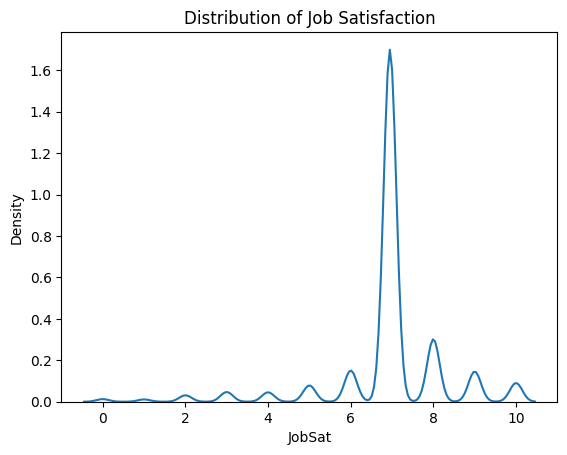

In [35]:
## Write your code here
sns.kdeplot(data=df, x='JobSat') 
plt.title('Distribution of Job Satisfaction')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [12]:
pip install matplotlib_venn

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.1/35.1 MB 174.8 MB/s eta 0:00:0000:01
  Created wheel for matplotlib_venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=5028326f744c9259479f7f8b8b5cf6e72d41224715031d21157c03e58c1046d4
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib_venn
Note: you may need to restart the kernel to use updated packages.


In [13]:
from matplotlib_venn import venn2

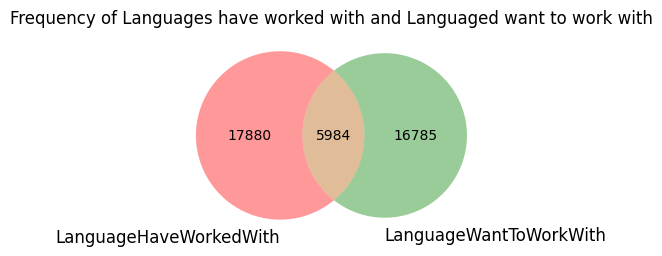

In [34]:
plt.figure(figsize=(4,4))
set1 = set(df['LanguageHaveWorkedWith'])
set2 = set(df['LanguageWantToWorkWith'])

venn2([set1, set2], ('LanguageHaveWorkedWith', 'LanguageWantToWorkWith'))
plt.title('Frequency of Languages have worked with and Languaged want to work with')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [27]:
df['Country'] = df['Country'].replace({'United Kingdom of Great Britain and Northern Ireland': 'UK and Ireland', 'Iran, Islamic Republic of...':'Iran', 
                       'Venezuela, Bolivarian Republic of...':'Venezuela',"Democratic People's Republic of Korea":'Korea', 'Congo, Republic of the...':'Congo', 
                       'Micronesia, Federated States of...': 'Micronesia'})  
df['Country'].unique()

array(['United States of America', 'UK and Ireland', 'Canada', 'Norway',
       'Uzbekistan', 'Serbia', 'Poland', 'Philippines', 'Bulgaria',
       'Switzerland', 'India', 'Germany', 'Ireland', 'Italy', 'Ukraine',
       'Australia', 'Brazil', 'Japan', 'Austria', 'Iran', 'France',
       'Saudi Arabia', 'Romania', 'Turkey', 'Nepal', 'Algeria', 'Sweden',
       'Netherlands', 'Croatia', 'Pakistan', 'Czech Republic',
       'Republic of North Macedonia', 'Finland', 'Slovakia',
       'Russian Federation', 'Greece', 'Israel', 'Belgium', 'Mexico',
       'United Republic of Tanzania', 'Hungary', 'Argentina', 'Portugal',
       'Sri Lanka', 'Latvia', 'China', 'Singapore', 'Lebanon', 'Spain',
       'South Africa', 'Lithuania', 'Viet Nam', 'Dominican Republic',
       'Indonesia', 'Kosovo', 'Morocco', 'Taiwan', 'Georgia',
       'San Marino', 'Tunisia', 'Bangladesh', 'Nigeria', 'Liechtenstein',
       'Denmark', 'Ecuador', 'Malaysia', 'Albania', 'Azerbaijan', 'Chile',
       'Ghana', 'Peru',

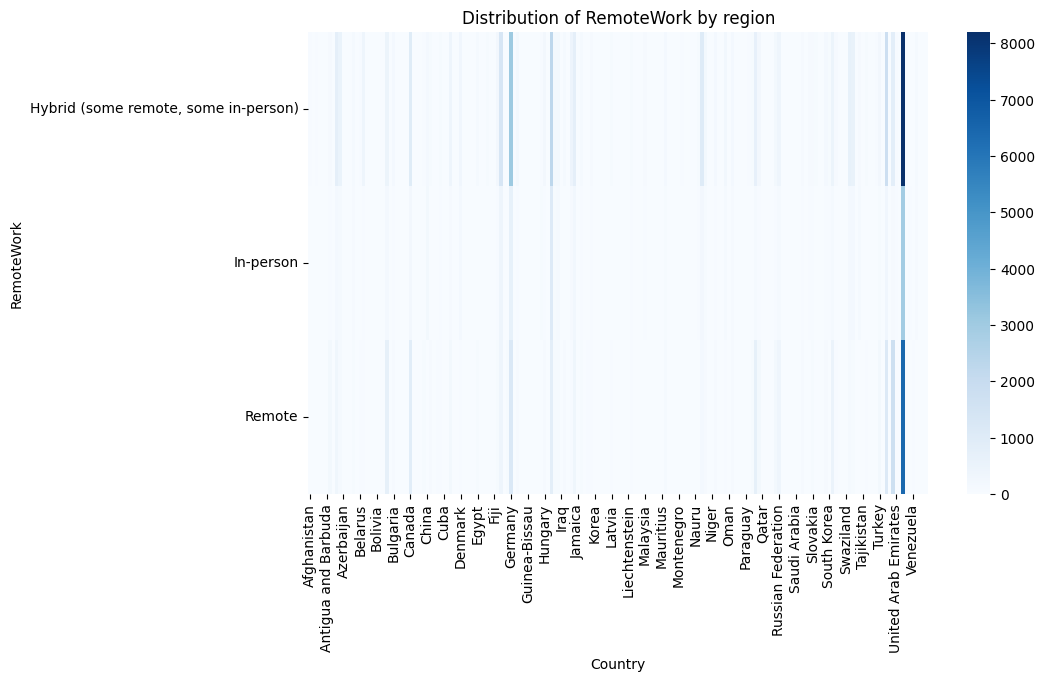

In [33]:
## Write your code here
plt.figure(figsize=(10,6)) 
heatmap = pd.crosstab(df['RemoteWork'], df['Country']) 
sns.heatmap(heatmap, cmap='Blues') 
plt.title('Distribution of RemoteWork by region')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [17]:
## Write your code here
df[['JobSat', 'YearsCodePro']].corr()

,JobSat,YearsCodePro
JobSat,1.000000,0.067651
YearsCodePro,0.067651,1.000000


In [25]:
import scipy.stats as stats

In [26]:
p_coef , p_value = stats.pearsonr(df['JobSat'], df['YearsCodePro']) 
print(f"Pearson coefficient is {p_coef} and P value is {p_value}")

Pearson coefficient is 0.06765060039241155 and P value is 3.047682706208658e-67


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


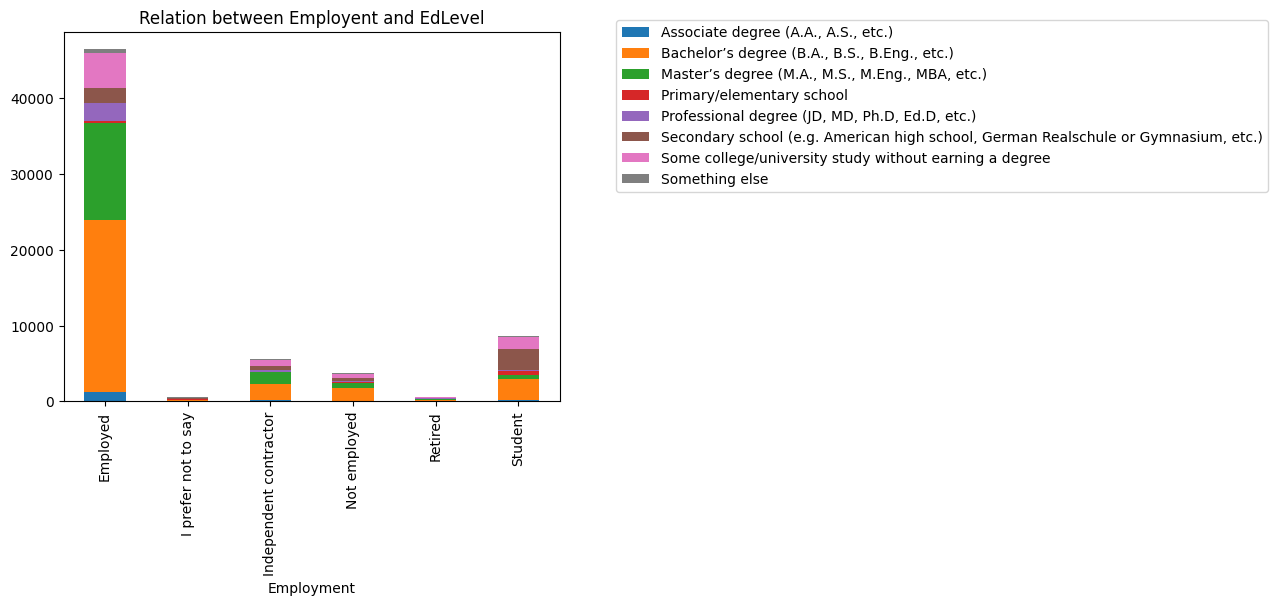

In [32]:
## Write your code here
stack = pd.crosstab(df['Employment'], df['EdLevel']) 
stack.plot(kind='bar', stacked=True) 
plt.title('Relation between Employent and EdLevel')
plt.legend(bbox_to_anchor = (1.1,1.05))
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [36]:
## Write your code here
df.to_csv('Cleaned_survey_dataset.csv')

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
